In [1]:
import pandas as pd
import numpy as np

### Файлы для обработки

In [2]:
from os import listdir
from os.path import isfile, join


data_catalog = "..//..//Realtime-Emotion-Detection-master//video_emotions_recognized//4_group//"
data_files = [f for f in listdir(data_catalog) if isfile(join(data_catalog, f))]
data_files = sorted(data_files)
data_files

['dima.csv',
 'dima_k_1.csv',
 'dima_k_2.csv',
 'dima_k_3.csv',
 'ilya.csv',
 'polina.csv',
 'zhenya.csv']

### Имена участников

In [3]:
name_1 = "dima"
name_2 = "dima_k"
name_3 = "ilya"
name_4 = "polina"
name_5 = "zhenya"

### 1 датасет

In [4]:
df_1 = pd.read_csv(data_catalog + data_files[0], sep = "\t", names = ["number", "emotion"])
df_1.number = df_1.number + 5554
df_1.head()

,number,emotion
0,5555,NaN
1,5556,NaN
2,5557,NaN
3,5558,NaN
4,5559,NaN


#### Базовая эмоция

In [5]:
base_1 = df_1["emotion"].value_counts()
base_1

neutral     12886
happy        8962
fear          344
surprise       56
Name: emotion, dtype: int64

In [6]:
base_emotion_1_1 = "neutral"
base_emotion_1_2 = "happy"

df_1["emotion_mapped"] = df_1["emotion"].replace([base_emotion_1_1, base_emotion_1_2], "base")
df_1["emotion_mapped"] = df_1["emotion_mapped"].map({"neutral": "positive", "fear": "negative", 
                                                     "surprise": "positive", "happy": "positive", 
                                                     "sad": "negative", "base": "base", "angry": "negative"})
df_1.head()

,number,emotion,emotion_mapped
0,5555,NaN,NaN
1,5556,NaN,NaN
2,5557,NaN,NaN
3,5558,NaN,NaN
4,5559,NaN,NaN


####  Отклонения от базовой эмоции

In [7]:
deviations_1 = df_1[(pd.notnull(df_1.emotion)) & (df_1.emotion != base_emotion_1_1) & 
                    (df_1.emotion != base_emotion_1_2)]["number"]
deviations_1 = list(deviations_1.values)

### 2 датасет

In [8]:
df_2_1 = pd.read_csv(data_catalog + data_files[1], sep = "\t", names = ["number", "emotion"])
df_2_2 = pd.read_csv(data_catalog + data_files[2], sep = "\t", names = ["number", "emotion"])
df_2_2.number = df_2_2.number + len(df_2_1)
df_2_3 = pd.read_csv(data_catalog + data_files[3], sep = "\t", names = ["number", "emotion"])
df_2_3.number = df_2_3.number + len(df_2_2)
df_2 = pd.concat([df_2_1, df_2_2, df_2_3], ignore_index = True)

df_2.head()


,number,emotion
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN


#### Базовая эмоция

In [9]:
base_2 = df_2["emotion"].value_counts()
base_2

neutral    3621
happy       162
fear         14
Name: emotion, dtype: int64

In [10]:
base_emotion_2 = base_2[base_2 == base_2.max()].index[0]


df_2["emotion_mapped"] = df_2["emotion"].replace(base_emotion_2, "base")
df_2["emotion_mapped"] = df_2["emotion_mapped"].map({"neutral": "positive", "fear": "negative", 
                                                     "surprise": "positive", "happy": "positive", 
                                                     "sad": "negative", "base": "base", "angry": "negative"})
df_2.head()

,number,emotion,emotion_mapped
0,1,NaN,NaN
1,2,NaN,NaN
2,3,NaN,NaN
3,4,NaN,NaN
4,5,NaN,NaN


####  Отклонения от базовой эмоции

In [11]:
deviations_2 = df_2[(pd.notnull(df_2.emotion)) & (df_2.emotion != base_emotion_2)]["number"]
deviations_2 = list(deviations_2.values)

### 3 датасет

In [12]:
df_3 = pd.read_csv(data_catalog + data_files[4], sep = "\t", names = ["number", "emotion"])
df_3.head()

,number,emotion
0,1,fear
1,2,fear
2,3,fear
3,4,fear
4,5,fear


#### Базовая эмоция

In [13]:
base_3 = df_3["emotion"].value_counts()
base_3

happy       19923
fear        18396
neutral      9739
surprise     1094
sad            80
Name: emotion, dtype: int64

In [14]:
base_emotion_3_1 = base_3[base_3 == base_3.max()].index[0]
base_emotion_3_2 = "neutral"
base_emotion_3_3 = "fear"


df_3["emotion_mapped"] = df_3["emotion"].replace([base_emotion_3_1, base_emotion_3_2, base_emotion_3_3], "base")
df_3["emotion_mapped"] = df_3["emotion_mapped"].map({"neutral": "positive", "fear": "negative", 
                                                     "surprise": "positive", "happy": "positive", 
                                                     "sad": "negative", "base": "base", "angry": "negative"})
df_3.head()

,number,emotion,emotion_mapped
0,1,fear,base
1,2,fear,base
2,3,fear,base
3,4,fear,base
4,5,fear,base


####  Отклонения от базовой эмоции

In [15]:
deviations_3 = df_3[(pd.notnull(df_3.emotion)) & (df_3.emotion != base_emotion_3_1) &
                   (df_3.emotion != base_emotion_3_2) & (df_3.emotion != base_emotion_3_3)]["number"]
deviations_3 = list(deviations_3.values)

### 4 датасет

In [16]:
df_4 = pd.read_csv(data_catalog + data_files[5], sep = "\t", names = ["number", "emotion"])
df_4.head()

,number,emotion
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN


#### Базовая эмоция

In [17]:
base_4 = df_4["emotion"].value_counts()
base_4

happy      30843
neutral     3515
fear         651
Name: emotion, dtype: int64

In [18]:
base_emotion_4 = base_4[base_4 == base_4.max()].index[0]


df_4["emotion_mapped"] = df_4["emotion"].replace(base_emotion_4, "base")
df_4["emotion_mapped"] = df_4["emotion_mapped"].map({"neutral": "positive", "fear": "negative", 
                                                     "surprise": "positive", "happy": "positive", 
                                                     "sad": "negative", "base": "base", "angry": "negative"})
df_4.head()

,number,emotion,emotion_mapped
0,1,NaN,NaN
1,2,NaN,NaN
2,3,NaN,NaN
3,4,NaN,NaN
4,5,NaN,NaN


####  Отклонения от базовой эмоции

In [19]:
deviations_4 = df_4[(pd.notnull(df_4.emotion)) & (df_4.emotion != base_emotion_4)]["number"]
deviations_4 = list(deviations_4.values)

### 5 датасет

In [20]:
df_5 = pd.read_csv(data_catalog + data_files[6], sep = "\t", names = ["number", "emotion"])
df_5.head()

,number,emotion
0,1,surprise
1,2,surprise
2,3,surprise
3,4,surprise
4,5,surprise


#### Базовая эмоция

In [21]:
base_5 = df_5["emotion"].value_counts()
base_5

happy       14821
neutral      6891
surprise      610
fear          598
sad            15
Name: emotion, dtype: int64

In [22]:
base_emotion_5_1 = base_5[base_5 == base_5.max()].index[0]
base_emotion_5_2 = "neutral"

df_5["emotion_mapped"] = df_5["emotion"].replace([base_emotion_5_1, base_emotion_5_2], "base")
df_5["emotion_mapped"] = df_5["emotion_mapped"].map({"neutral": "positive", "fear": "negative", 
                                                     "surprise": "positive", "happy": "positive", 
                                                     "sad": "negative", "base": "base", "angry": "negative"})
df_5.head()

,number,emotion,emotion_mapped
0,1,surprise,positive
1,2,surprise,positive
2,3,surprise,positive
3,4,surprise,positive
4,5,surprise,positive


####  Отклонения от базовой эмоции

In [23]:
deviations_5 = df_5[(pd.notnull(df_5.emotion)) & (df_5.emotion != base_emotion_5_1) & 
                    (df_5.emotion != base_emotion_5_2)]["number"]
deviations_5 = list(deviations_5.values)

### 1 человек

In [24]:
with_exitment_1 = pd.DataFrame(columns = ["sender_name", "sender_id", "emotion_sent", "reciever_name", 
                                          "emotion_recieved"])

for number in deviations_1:
    
    temp_df_2 = df_2[(df_2.number >= number) & (df_2.number <= number + 100) & 
                     (df_2.emotion != base_emotion_2) & (pd.notnull(df_2.emotion))]
    temp_df_3 = df_3[(df_3.number >= number) & (df_3.number <= number + 100) & 
                     (df_3.emotion != base_emotion_3_1) & (df_3.emotion != base_emotion_3_2) & 
                     (df_3.emotion != base_emotion_3_3) & (pd.notnull(df_3.emotion))]
    temp_df_4 = df_4[(df_4.number >= number) & (df_4.number <= number + 100) & 
                     (df_4.emotion != base_emotion_4) & (pd.notnull(df_4.emotion))]
    temp_df_5 = df_5[(df_5.number >= number) & (df_5.number <= number + 100) & 
                     (df_5.emotion != base_emotion_5_1) & (df_5.emotion != base_emotion_5_2) &
                     (pd.notnull(df_5.emotion))]

    emotion_sent = df_1.loc[number - 1, "emotion_mapped"]
    sender_name = name_1
    
    if len(temp_df_2) != 0:
        recieved = temp_df_2.iloc[:, 2].value_counts()
        recieved_emotion = recieved[recieved == recieved.max()].index[0]
        temp_dataset_2 = pd.DataFrame(data = {"sender_name": sender_name, 
                                              "sender_id": number, 
                                              "emotion_sent": emotion_sent,
                                              "reciever_name": name_2, 
                                              "emotion_recieved": recieved_emotion}, index = [0])
        with_exitment_1 = pd.concat([with_exitment_1, temp_dataset_2], ignore_index = True)

    if len(temp_df_3) != 0:
        recieved = temp_df_3.iloc[:, 2].value_counts()
        recieved_emotion = recieved[recieved == recieved.max()].index[0]
        temp_dataset_3 = pd.DataFrame(data = {"sender_name": sender_name, 
                                              "sender_id": number, 
                                              "emotion_sent": emotion_sent,
                                              "reciever_name": name_3, 
                                              "emotion_recieved": recieved_emotion}, index = [0])
        with_exitment_1 = pd.concat([with_exitment_1, temp_dataset_3], ignore_index = True)
        
    if len(temp_df_4) != 0:
        recieved = temp_df_4.iloc[:, 2].value_counts()
        recieved_emotion = recieved[recieved == recieved.max()].index[0]
        temp_dataset_4 = pd.DataFrame(data = {"sender_name": sender_name, 
                                              "sender_id": number, 
                                              "emotion_sent": emotion_sent,
                                              "reciever_name": name_4, 
                                              "emotion_recieved": recieved_emotion}, index = [0])
        with_exitment_1 = pd.concat([with_exitment_1, temp_dataset_4], ignore_index = True)
        
    if len(temp_df_5) != 0:
        recieved = temp_df_5.iloc[:, 2].value_counts()
        recieved_emotion = recieved[recieved == recieved.max()].index[0]
        temp_dataset_5 = pd.DataFrame(data = {"sender_name": sender_name, 
                                              "sender_id": number, 
                                              "emotion_sent": emotion_sent,
                                              "reciever_name": name_5, 
                                              "emotion_recieved": recieved_emotion}, index = [0])
        with_exitment_1 = pd.concat([with_exitment_1, temp_dataset_5], ignore_index = True)

### 2 человек

In [25]:
with_exitment_2 = pd.DataFrame(columns = ["sender_name", "sender_id", "emotion_sent", "reciever_name", 
                                          "emotion_recieved"])

for number in deviations_2:
    
    temp_df_1 = df_1[(df_1.number >= number) & (df_1.number <= number + 100) & 
                     (df_1.emotion != base_emotion_1_1) & (df_1.emotion != base_emotion_1_2) &
                     (pd.notnull(df_1.emotion))]
    temp_df_3 = df_3[(df_3.number >= number) & (df_3.number <= number + 100) & 
                     (df_3.emotion != base_emotion_3_1) & (df_3.emotion != base_emotion_3_2) & 
                     (df_3.emotion != base_emotion_3_3) & (pd.notnull(df_3.emotion))]
    temp_df_4 = df_4[(df_4.number >= number) & (df_4.number <= number + 100) & 
                     (df_4.emotion != base_emotion_4) & (pd.notnull(df_4.emotion))]
    temp_df_5 = df_5[(df_5.number >= number) & (df_5.number <= number + 100) & 
                     (df_5.emotion != base_emotion_5_1) & (df_5.emotion != base_emotion_5_2) &
                     (pd.notnull(df_5.emotion))]
    
    emotion_sent = df_2.loc[number - 1, "emotion_mapped"]
    sender_name = name_2
    
    if len(temp_df_1) != 0:
        recieved = temp_df_1.iloc[:, 2].value_counts()
        recieved_emotion = recieved[recieved == recieved.max()].index[0]
        temp_dataset_1 = pd.DataFrame(data = {"sender_name": sender_name, 
                                              "sender_id": number, 
                                              "emotion_sent": emotion_sent,
                                              "reciever_name": name_1, 
                                              "emotion_recieved": recieved_emotion}, index = [0])
        with_exitment_2 = pd.concat([with_exitment_2, temp_dataset_1], ignore_index = True)

    if len(temp_df_3) != 0:
        recieved = temp_df_3.iloc[:, 2].value_counts()
        recieved_emotion = recieved[recieved == recieved.max()].index[0]
        temp_dataset_3 = pd.DataFrame(data = {"sender_name": sender_name, 
                                              "sender_id": number, 
                                              "emotion_sent": emotion_sent,
                                              "reciever_name": name_3, 
                                              "emotion_recieved": recieved_emotion}, index = [0])
        with_exitment_2 = pd.concat([with_exitment_2, temp_dataset_3], ignore_index = True)
        
    if len(temp_df_4) != 0:
        recieved = temp_df_4.iloc[:, 2].value_counts()
        recieved_emotion = recieved[recieved == recieved.max()].index[0]
        temp_dataset_4 = pd.DataFrame(data = {"sender_name": sender_name, 
                                              "sender_id": number, 
                                              "emotion_sent": emotion_sent,
                                              "reciever_name": name_4, 
                                              "emotion_recieved": recieved_emotion}, index = [0])
        with_exitment_2 = pd.concat([with_exitment_2, temp_dataset_4], ignore_index = True)
        
    if len(temp_df_5) != 0:
        recieved = temp_df_5.iloc[:, 2].value_counts()
        recieved_emotion = recieved[recieved == recieved.max()].index[0]
        temp_dataset_5 = pd.DataFrame(data = {"sender_name": sender_name, 
                                              "sender_id": number, 
                                              "emotion_sent": emotion_sent,
                                              "reciever_name": name_5, 
                                              "emotion_recieved": recieved_emotion}, index = [0])
        with_exitment_2 = pd.concat([with_exitment_2, temp_dataset_5], ignore_index = True)

### 3 человек

In [26]:
with_exitment_3 = pd.DataFrame(columns = ["sender_name", "sender_id", "emotion_sent", "reciever_name", 
                                          "emotion_recieved"])

for number in deviations_3:
    
    temp_df_1 = df_1[(df_1.number >= number) & (df_1.number <= number + 100) & 
                     (df_1.emotion != base_emotion_1_1) & (df_1.emotion != base_emotion_1_2) &
                     (pd.notnull(df_1.emotion))]
    temp_df_2 = df_2[(df_2.number >= number) & (df_2.number <= number + 100) & 
                     (df_2.emotion != base_emotion_2) & (pd.notnull(df_2.emotion))]
    temp_df_4 = df_4[(df_4.number >= number) & (df_4.number <= number + 100) & 
                     (df_4.emotion != base_emotion_4) & (pd.notnull(df_4.emotion))]
    temp_df_5 = df_5[(df_5.number >= number) & (df_5.number <= number + 100) & 
                     (df_5.emotion != base_emotion_5_1) & (df_5.emotion != base_emotion_5_2) &
                     (pd.notnull(df_5.emotion))]
    
    emotion_sent = df_3.loc[number - 1, "emotion_mapped"]
    sender_name = name_3
    
    if len(temp_df_1) != 0:
        recieved = temp_df_1.iloc[:, 2].value_counts()
        recieved_emotion = recieved[recieved == recieved.max()].index[0]
        temp_dataset_1 = pd.DataFrame(data = {"sender_name": sender_name, 
                                              "sender_id": number, 
                                              "emotion_sent": emotion_sent,
                                              "reciever_name": name_1, 
                                              "emotion_recieved": recieved_emotion}, index = [0])
        with_exitment_3 = pd.concat([with_exitment_3, temp_dataset_1], ignore_index = True)

    if len(temp_df_2) != 0:
        recieved = temp_df_2.iloc[:, 2].value_counts()
        recieved_emotion = recieved[recieved == recieved.max()].index[0]
        temp_dataset_2 = pd.DataFrame(data = {"sender_name": sender_name, 
                                              "sender_id": number, 
                                              "emotion_sent": emotion_sent,
                                              "reciever_name": name_2, 
                                              "emotion_recieved": recieved_emotion}, index = [0])
        with_exitment_3 = pd.concat([with_exitment_3, temp_dataset_2], ignore_index = True)
        
    if len(temp_df_4) != 0:
        recieved = temp_df_4.iloc[:, 2].value_counts()
        recieved_emotion = recieved[recieved == recieved.max()].index[0]
        temp_dataset_4 = pd.DataFrame(data = {"sender_name": sender_name, 
                                              "sender_id": number, 
                                              "emotion_sent": emotion_sent,
                                              "reciever_name": name_4, 
                                              "emotion_recieved": recieved_emotion}, index = [0])
        with_exitment_3 = pd.concat([with_exitment_3, temp_dataset_4], ignore_index = True)
        
    if len(temp_df_5) != 0:
        recieved = temp_df_5.iloc[:, 2].value_counts()
        recieved_emotion = recieved[recieved == recieved.max()].index[0]
        temp_dataset_5 = pd.DataFrame(data = {"sender_name": sender_name, 
                                              "sender_id": number, 
                                              "emotion_sent": emotion_sent,
                                              "reciever_name": name_5, 
                                              "emotion_recieved": recieved_emotion}, index = [0])
        with_exitment_3 = pd.concat([with_exitment_3, temp_dataset_5], ignore_index = True)

### 4 человек

In [27]:
with_exitment_4 = pd.DataFrame(columns = ["sender_name", "sender_id", "emotion_sent", "reciever_name", 
                                          "emotion_recieved"])

for number in deviations_4:
    
    temp_df_1 = df_1[(df_1.number >= number) & (df_1.number <= number + 100) & 
                     (df_1.emotion != base_emotion_1_1) & (df_1.emotion != base_emotion_1_2) &
                     (pd.notnull(df_1.emotion))]
    temp_df_2 = df_2[(df_2.number >= number) & (df_2.number <= number + 100) & 
                     (df_2.emotion != base_emotion_2) & (pd.notnull(df_2.emotion))]
    temp_df_3 = df_3[(df_3.number >= number) & (df_3.number <= number + 100) & 
                     (df_3.emotion != base_emotion_3_1) & (df_3.emotion != base_emotion_3_2) & 
                     (df_3.emotion != base_emotion_3_3) & (pd.notnull(df_3.emotion))]
    temp_df_5 = df_5[(df_5.number >= number) & (df_5.number <= number + 100) & 
                     (df_5.emotion != base_emotion_5_1) & (df_5.emotion != base_emotion_5_2) &
                     (pd.notnull(df_5.emotion))]
    
    emotion_sent = df_4.loc[number - 1, "emotion_mapped"]
    sender_name = name_4
    
    if len(temp_df_1) != 0:
        recieved = temp_df_1.iloc[:, 2].value_counts()
        recieved_emotion = recieved[recieved == recieved.max()].index[0]
        temp_dataset_1 = pd.DataFrame(data = {"sender_name": sender_name, 
                                              "sender_id": number, 
                                              "emotion_sent": emotion_sent,
                                              "reciever_name": name_1, 
                                              "emotion_recieved": recieved_emotion}, index = [0])
        with_exitment_4 = pd.concat([with_exitment_4, temp_dataset_1], ignore_index = True)

    if len(temp_df_2) != 0:
        recieved = temp_df_2.iloc[:, 2].value_counts()
        recieved_emotion = recieved[recieved == recieved.max()].index[0]
        temp_dataset_2 = pd.DataFrame(data = {"sender_name": sender_name, 
                                              "sender_id": number, 
                                              "emotion_sent": emotion_sent,
                                              "reciever_name": name_2, 
                                              "emotion_recieved": recieved_emotion}, index = [0])
        with_exitment_4 = pd.concat([with_exitment_4, temp_dataset_2], ignore_index = True)
        
    if len(temp_df_3) != 0:
        recieved = temp_df_3.iloc[:, 2].value_counts()
        recieved_emotion = recieved[recieved == recieved.max()].index[0]
        temp_dataset_3 = pd.DataFrame(data = {"sender_name": sender_name, 
                                              "sender_id": number, 
                                              "emotion_sent": emotion_sent,
                                              "reciever_name": name_3, 
                                              "emotion_recieved": recieved_emotion}, index = [0])
        with_exitment_4 = pd.concat([with_exitment_4, temp_dataset_3], ignore_index = True)
        
    if len(temp_df_5) != 0:
        recieved = temp_df_5.iloc[:, 2].value_counts()
        recieved_emotion = recieved[recieved == recieved.max()].index[0]
        temp_dataset_5 = pd.DataFrame(data = {"sender_name": sender_name, 
                                              "sender_id": number, 
                                              "emotion_sent": emotion_sent,
                                              "reciever_name": name_5, 
                                              "emotion_recieved": recieved_emotion}, index = [0])
        with_exitment_4 = pd.concat([with_exitment_4, temp_dataset_5], ignore_index = True)

### 5 человек

In [28]:
with_exitment_5 = pd.DataFrame(columns = ["sender_name", "sender_id", "emotion_sent", "reciever_name", 
                                          "emotion_recieved"])

for number in deviations_5:
    
    temp_df_1 = df_1[(df_1.number >= number) & (df_1.number <= number + 100) & 
                     (df_1.emotion != base_emotion_1_1) & (df_1.emotion != base_emotion_1_2) &
                     (pd.notnull(df_1.emotion))]
    temp_df_2 = df_2[(df_2.number >= number) & (df_2.number <= number + 100) & 
                     (df_2.emotion != base_emotion_2) & (pd.notnull(df_2.emotion))]
    temp_df_3 = df_3[(df_3.number >= number) & (df_3.number <= number + 100) & 
                     (df_3.emotion != base_emotion_3_1) & (df_3.emotion != base_emotion_3_2) & 
                     (df_3.emotion != base_emotion_3_3) & (pd.notnull(df_3.emotion))]
    temp_df_4 = df_4[(df_4.number >= number) & (df_4.number <= number + 100) & 
                     (df_4.emotion != base_emotion_4) & (pd.notnull(df_4.emotion))]
    
    emotion_sent = df_5.loc[number - 1, "emotion_mapped"]
    sender_name = name_5
    
    if len(temp_df_1) != 0:
        recieved = temp_df_1.iloc[:, 2].value_counts()
        recieved_emotion = recieved[recieved == recieved.max()].index[0]
        temp_dataset_1 = pd.DataFrame(data = {"sender_name": sender_name, 
                                              "sender_id": number, 
                                              "emotion_sent": emotion_sent,
                                              "reciever_name": name_1, 
                                              "emotion_recieved": recieved_emotion}, index = [0])
        with_exitment_5 = pd.concat([with_exitment_5, temp_dataset_1], ignore_index = True)

    if len(temp_df_2) != 0:
        recieved = temp_df_2.iloc[:, 2].value_counts()
        recieved_emotion = recieved[recieved == recieved.max()].index[0]
        temp_dataset_2 = pd.DataFrame(data = {"sender_name": sender_name,
                                              "sender_id": number,
                                              "emotion_sent": emotion_sent,
                                              "reciever_name": name_2,
                                              "emotion_recieved": recieved_emotion}, index = [0])
        with_exitment_5 = pd.concat([with_exitment_5, temp_dataset_2], ignore_index = True)
        
    if len(temp_df_3) != 0:
        recieved = temp_df_3.iloc[:, 2].value_counts()
        recieved_emotion = recieved[recieved == recieved.max()].index[0]
        temp_dataset_3 = pd.DataFrame(data = {"sender_name": sender_name,
                                              "sender_id": number,
                                              "emotion_sent": emotion_sent,
                                              "reciever_name": name_3,
                                              "emotion_recieved": recieved_emotion}, index = [0])
        with_exitment_5 = pd.concat([with_exitment_5, temp_dataset_3], ignore_index = True)
        
    if len(temp_df_4) != 0:
        recieved = temp_df_4.iloc[:, 2].value_counts()
        recieved_emotion = recieved[recieved == recieved.max()].index[0]
        temp_dataset_4 = pd.DataFrame(data = {"sender_name": sender_name,
                                              "sender_id": number,
                                              "emotion_sent": emotion_sent,
                                              "reciever_name": name_4,
                                              "emotion_recieved": recieved_emotion}, index = [0])
        with_exitment_5 = pd.concat([with_exitment_5, temp_dataset_4], ignore_index = True)

### Объединяем таблицы и сортируем

In [29]:
union_table = pd.concat([with_exitment_1, with_exitment_2, with_exitment_3, with_exitment_4, with_exitment_5], 
          sort = True, ignore_index = True)
union_table

,emotion_recieved,emotion_sent,reciever_name,sender_id,sender_name
0,positive,base,polina,14200,dima
1,positive,NaN,polina,14363,dima
2,negative,NaN,zhenya,14363,dima
3,positive,base,ilya,16529,dima
4,positive,base,polina,16529,dima
...,...,...,...,...,...
5523,positive,positive,ilya,51030,zhenya
5524,positive,positive,ilya,51032,zhenya
5525,positive,positive,ilya,51185,zhenya
5526,positive,positive,ilya,51213,zhenya


#### Получил и отправил одинаковые эмоции

In [30]:
union_similar = union_table[union_table.emotion_recieved == union_table.emotion_sent]
union_similar

,emotion_recieved,emotion_sent,reciever_name,sender_id,sender_name
448,negative,negative,polina,2847,dima_k
449,positive,positive,ilya,2849,dima_k
451,positive,positive,ilya,2850,dima_k
453,positive,positive,ilya,2866,dima_k
455,positive,positive,ilya,2868,dima_k
...,...,...,...,...,...
5523,positive,positive,ilya,51030,zhenya
5524,positive,positive,ilya,51032,zhenya
5525,positive,positive,ilya,51185,zhenya
5526,positive,positive,ilya,51213,zhenya


#### Человек, который больше всего заражал эмоциями

In [31]:
max_emotion_sent = union_similar.groupby(["sender_name"]).count()["sender_id"]
max_emotion_sent.sort_values(ascending = False)

sender_name
polina    1286
ilya       784
zhenya     581
dima_k      80
Name: sender_id, dtype: int64

In [44]:
round(max_emotion_sent / len(union_similar) * 100)

sender_name
dima_k     3.0
ilya      29.0
polina    47.0
zhenya    21.0
Name: sender_id, dtype: float64

#### Человек, который больше всего принимал эмоции других

In [32]:
max_emotion_recieved = union_similar.groupby(["reciever_name"]).count()["sender_id"]
max_emotion_recieved.sort_values(ascending = False)

reciever_name
ilya      959
polina    828
zhenya    576
dima_k    303
dima       65
Name: sender_id, dtype: int64

### Устойчивые пары

In [33]:
union_similar

,emotion_recieved,emotion_sent,reciever_name,sender_id,sender_name
448,negative,negative,polina,2847,dima_k
449,positive,positive,ilya,2849,dima_k
451,positive,positive,ilya,2850,dima_k
453,positive,positive,ilya,2866,dima_k
455,positive,positive,ilya,2868,dima_k
...,...,...,...,...,...
5523,positive,positive,ilya,51030,zhenya
5524,positive,positive,ilya,51032,zhenya
5525,positive,positive,ilya,51185,zhenya
5526,positive,positive,ilya,51213,zhenya


In [34]:
union_similar.groupby(["sender_name", "reciever_name", "emotion_sent"]).count()["emotion_recieved"]

sender_name  reciever_name  emotion_sent
dima_k       ilya           positive         26
             polina         negative          2
                            positive         49
             zhenya         positive          3
ilya         dima           negative          5
                            positive          9
             dima_k         positive         52
             polina         positive        515
             zhenya         negative          7
                            positive        196
polina       dima           negative         21
                            positive         17
             dima_k         negative          2
                            positive        230
             ilya           negative          9
                            positive        637
             zhenya         negative        138
                            positive        232
zhenya       dima           negative         13
             dima_k         positive         19

### Гистограммы

In [35]:
import matplotlib.pyplot as plt

#### Только позитивные и только негативные эмоции

In [36]:
all_positive = union_similar[union_similar.emotion_sent == "positive"]
all_negative = union_similar[union_similar.emotion_sent == "negative"]

In [47]:
positive_emotions = ["neutral", "surprise", "happy"]
negative_emotions = ["fear", "sad", "angry"]

positive_count = len(df_1[df_1.emotion.isin(positive_emotions)]) + len(df_2[df_2.emotion.isin(positive_emotions)]) + len(df_3[df_3.emotion.isin(positive_emotions)]) + len(df_4[df_4.emotion.isin(positive_emotions)]) + len(df_5[df_5.emotion.isin(positive_emotions)])
negative_count = len(df_1[df_1.emotion.isin(negative_emotions)]) + len(df_2[df_2.emotion.isin(negative_emotions)]) + len(df_3[df_3.emotion.isin(negative_emotions)]) + len(df_4[df_4.emotion.isin(negative_emotions)]) + len(df_5[df_5.emotion.isin(negative_emotions)])
print(len(all_positive) / positive_count)
print(len(all_negative) / negative_count)


0.02146336288818366
0.015076126977808737


#### Стадии

In [37]:
stage_1 = 25440
stage_2 = 26880
stage_3 = 35400
stage_4 = 39474

#### Для негативных эмоций

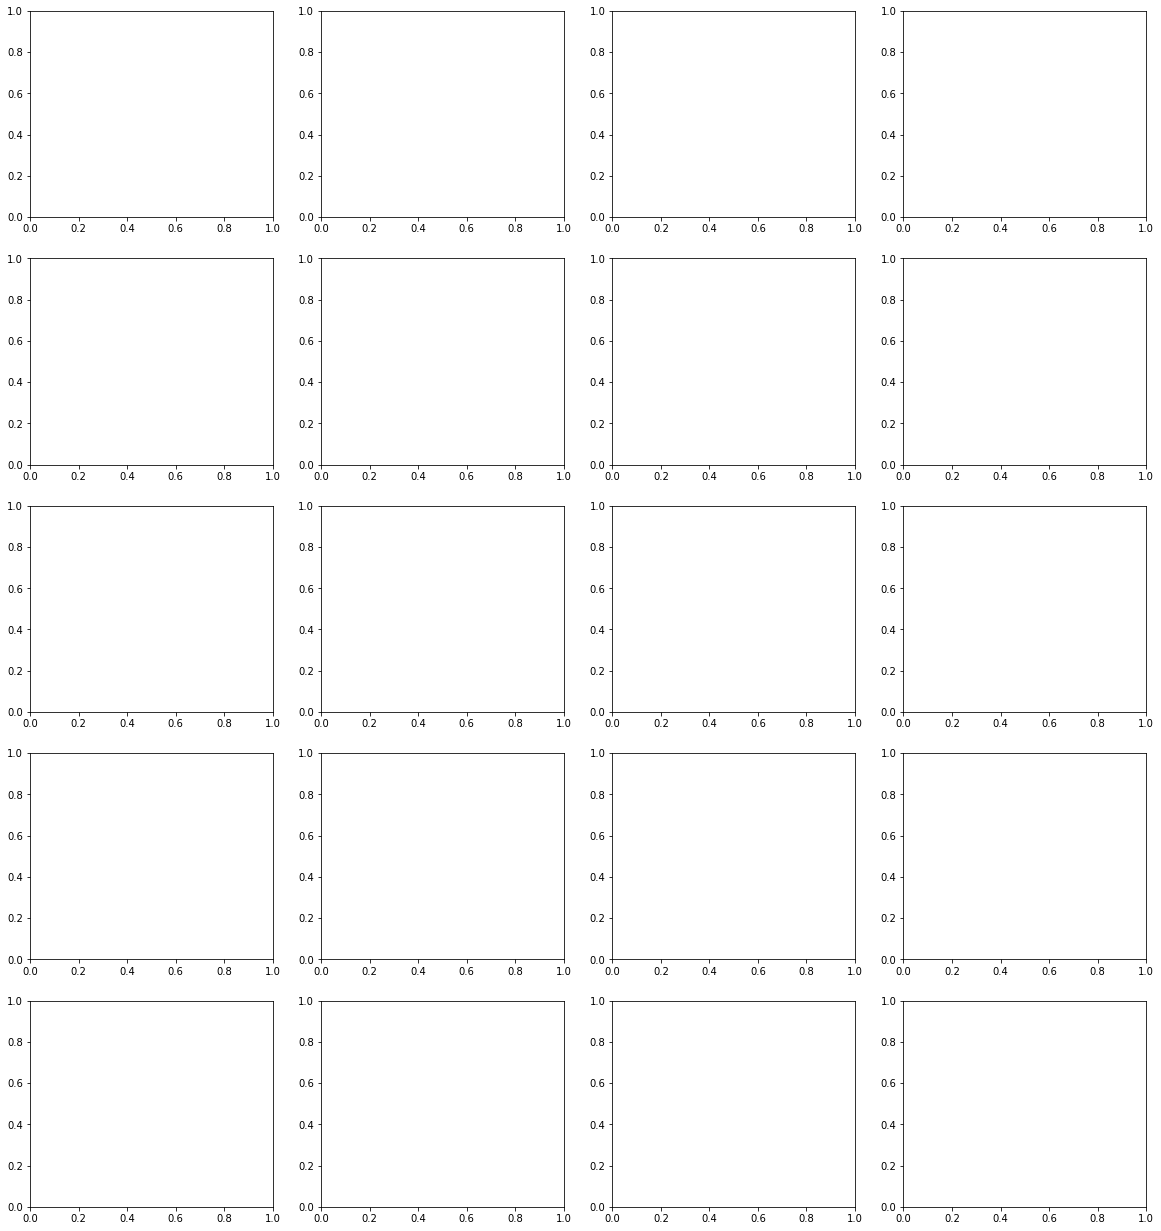

In [38]:
figsize = (20, 22)
fig, axes = plt.subplots(nrows = 5, ncols = 4, figsize = figsize)

# максимальное количество строк в датасетах
count_elements = max([len(df_1), len(df_2), len(df_3), len(df_4), len(df_5)])
# индекс отправителей
sender_index = {name_1: 0, name_2: 1, name_3: 2, name_4: 3, name_5: 4}
# отправители
senders = [name_1, name_2, name_3, name_4, name_5]

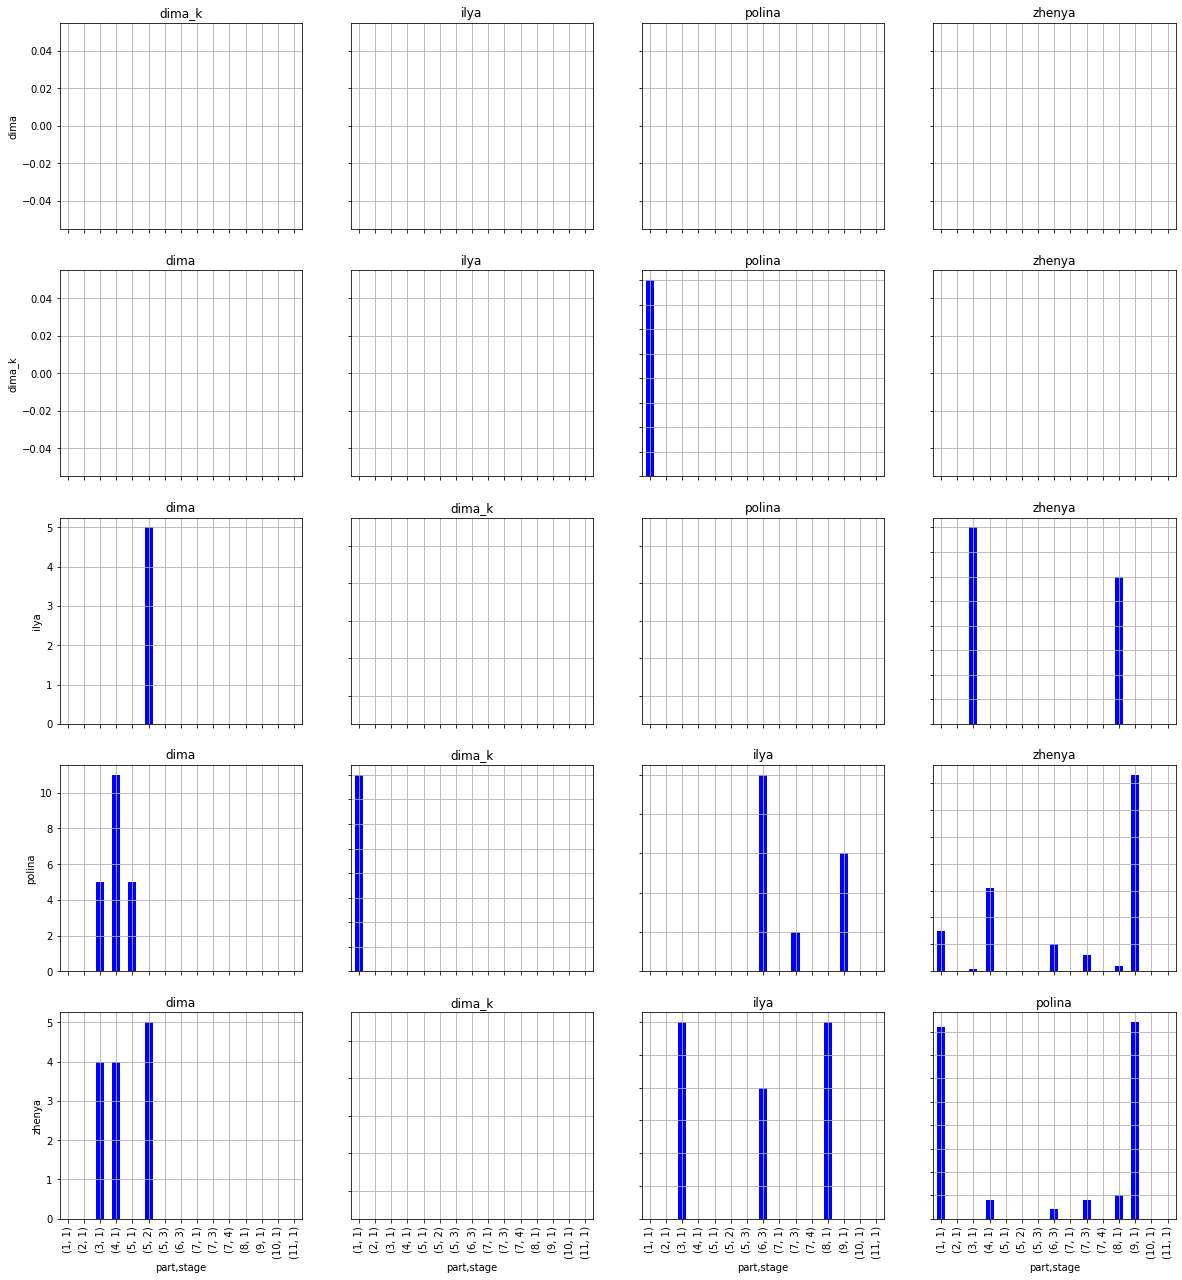

In [39]:
for sender_name in senders:
    sender = sender_name
    recievers = [name_1, name_2, name_3, name_4, name_5]
    recievers.remove(sender)

    for reciever in recievers:
        if reciever != sender:
            negative = all_negative[(all_negative.sender_name == sender) & (all_negative.reciever_name == reciever)]["sender_id"]
            negative_grid = pd.Series([0 for x in range(1, count_elements + 1)])

            for i in negative_grid.index:
                if i in negative.values:
                    negative_grid[i] = 1

            negative_grid = negative_grid[1:]

            # нужно исправить логику деления на стадии
            hist_negative = pd.DataFrame(negative_grid, columns = ["contageon"])
            hist_negative["stage"] = 1
            hist_negative.loc[0: stage_1, "stage"] = 1
            hist_negative.loc[stage_1 + 1:stage_2, "stage"] = 2
            hist_negative.loc[stage_2 + 1:stage_3, "stage"] = 3
            hist_negative.loc[stage_3 + 1:stage_4, "stage"] = 4

            # Делим на части
            parts_number = 10
            part_name = 1
            count_rows = 0
            multiplier = 1
            partition = round(len(hist_negative) / parts_number)

            hist_negative["part"] = 1

            while count_rows <= len(hist_negative):
                hist_negative.loc[count_rows:partition * multiplier, "part"] = part_name
                count_rows += partition
                multiplier += 1
                part_name += 1

            hist_data = hist_negative.groupby(["part", "stage"]).sum()
            hist_data.plot(ax = axes[sender_index[sender], recievers.index(reciever)], kind = "bar", 
                           color = "blue", sharex = True, sharey = True, title = reciever, grid = True, legend = False)
            axes[sender_index[sender], recievers.index(reciever)].set_ylabel(sender)
fig

#### Для позитивных эмоций

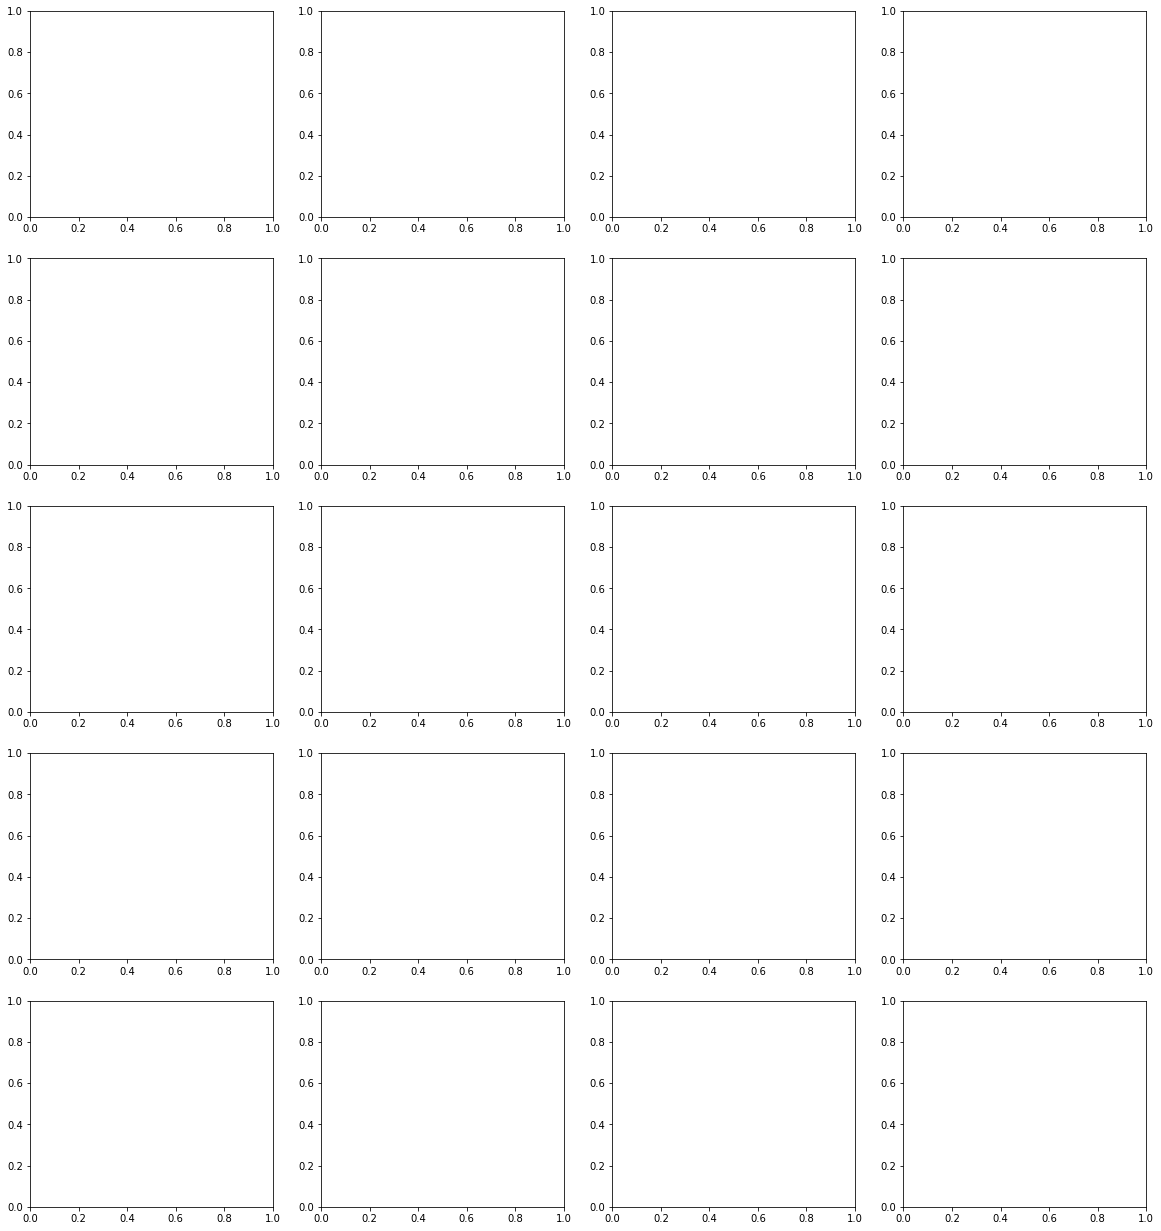

In [40]:
figsize = (20, 22)
fig, axes = plt.subplots(nrows = 5, ncols = 4, figsize = figsize)

# максимальное количество строк в датасетах
count_elements = max([len(df_1), len(df_2), len(df_3), len(df_4), len(df_5)])
# индекс отправителей
sender_index = {name_1: 0, name_2: 1, name_3: 2, name_4: 3, name_5: 4}
# отправители
senders = [name_1, name_2, name_3, name_4, name_5]

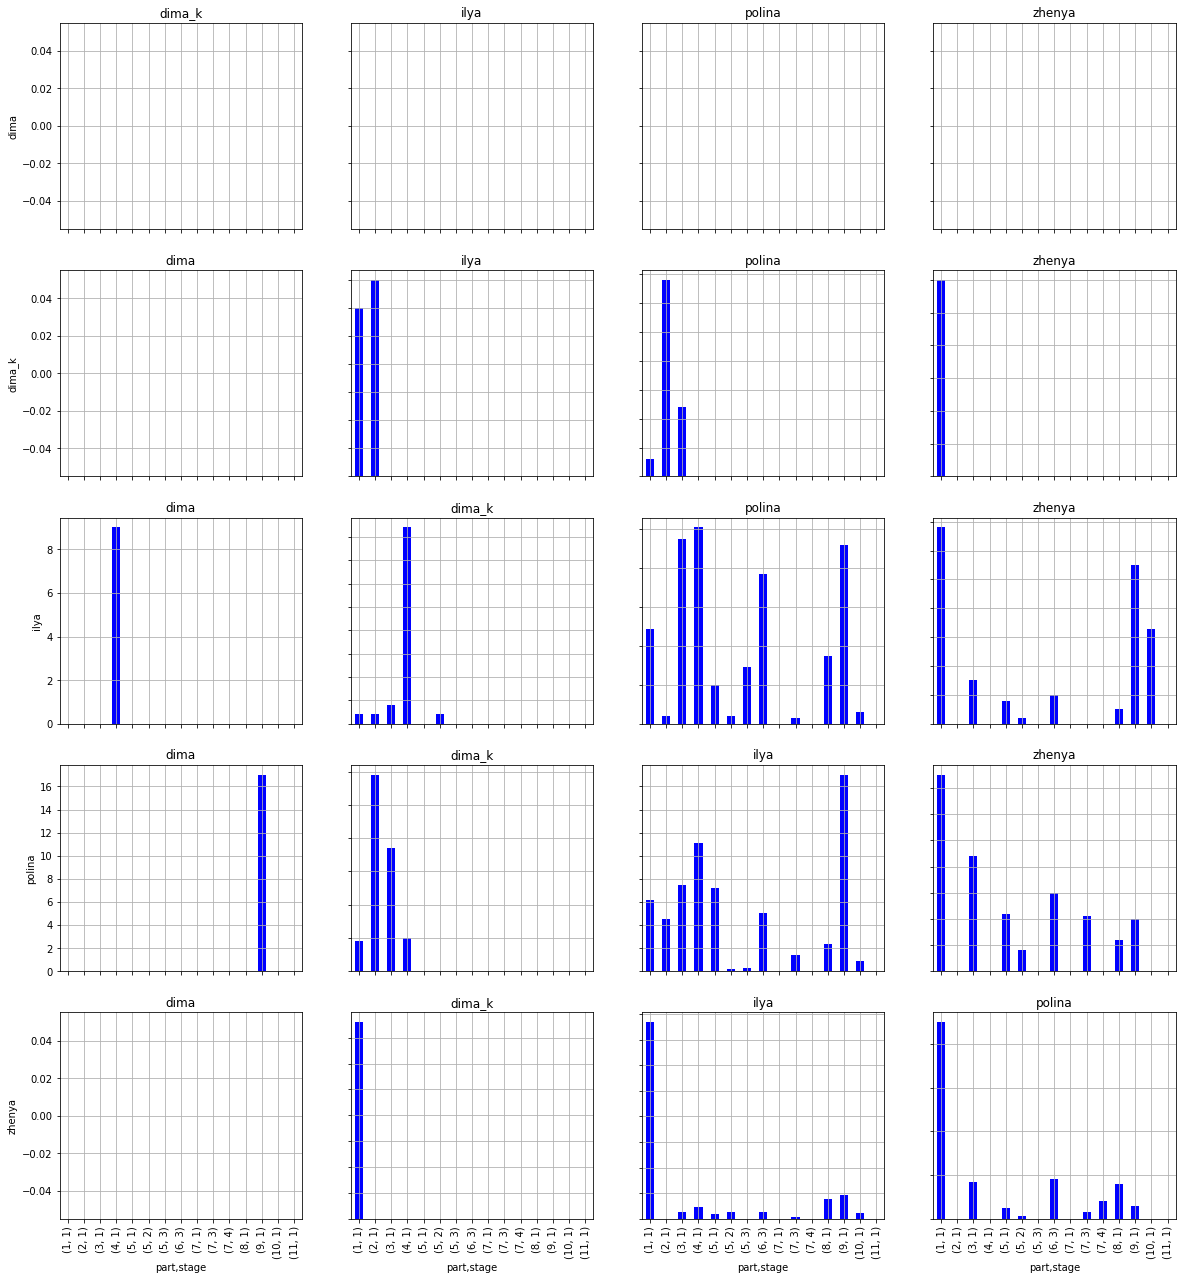

In [41]:
for sender_name in senders:
    sender = sender_name
    recievers = [name_1, name_2, name_3, name_4, name_5]
    recievers.remove(sender)

    for reciever in recievers:
        if reciever != sender:
            negative = all_positive[(all_positive.sender_name == sender) & (all_positive.reciever_name == reciever)]["sender_id"]
            negative_grid = pd.Series([0 for x in range(1, count_elements + 1)])

            for i in negative_grid.index:
                if i in negative.values:
                    negative_grid[i ] = 1

            negative_grid = negative_grid[1:]

            # нужно исправить логику деления на стадии
            hist_negative = pd.DataFrame(negative_grid, columns = ["contageon"])
            hist_negative["stage"] = 1
            hist_negative.loc[0: stage_1, "stage"] = 1
            hist_negative.loc[stage_1 + 1:stage_2, "stage"] = 2
            hist_negative.loc[stage_2 + 1:stage_3, "stage"] = 3
            hist_negative.loc[stage_3 + 1:stage_4, "stage"] = 4

            # Делим на части
            parts_number = 10
            part_name = 1
            count_rows = 0
            multiplier = 1
            partition = round(len(hist_negative) / parts_number)

            hist_negative["part"] = 1

            while count_rows <= len(hist_negative):
                hist_negative.loc[count_rows:partition * multiplier, "part"] = part_name
                count_rows += partition
                multiplier += 1
                part_name += 1

            hist_data = hist_negative.groupby(["part", "stage"]).sum()
            hist_data.plot(ax = axes[sender_index[sender], recievers.index(reciever)], kind = "bar", 
                           color = "blue", sharex = True, sharey = True, title = reciever, grid = True, legend = False)
            axes[sender_index[sender], recievers.index(reciever)].set_ylabel(sender)
fig

#### Общая гистограмма

Text(0.5, 0, 'Стадии обсуждения')

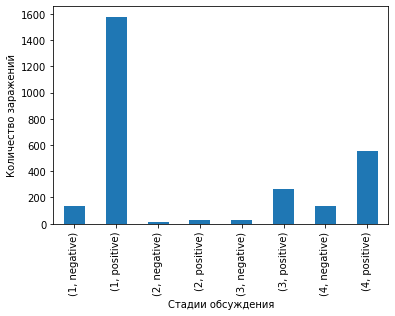

In [42]:
# Сначала нужно разделить на фазы общий датасет

hist_union = union_similar.copy()

hist_union["stage"] = 1
hist_union.loc[(hist_union["sender_id"].astype(int) > stage_1) & (hist_union["sender_id"].astype(int) <= stage_2), "stage"] = 2
hist_union.loc[(hist_union["sender_id"].astype(int) > stage_2) & (hist_union["sender_id"].astype(int) <= stage_3), "stage"] = 3
hist_union.loc[(hist_union["sender_id"].astype(int) > stage_3), "stage"] = 4

hist_union_grouped = hist_union.groupby(["stage", "emotion_sent"]).count()
hist_union_grouped_plot = hist_union_grouped["emotion_recieved"].plot(kind = "bar")
hist_union_grouped_plot.set_ylabel("Количество заражений")
hist_union_grouped_plot.set_xlabel("Стадии обсуждения")


#### Сколько в среднем происходит заражений по фазам и эмоциям

In [46]:
hist_union["count"] = 1
hist_union_grouped = hist_union.groupby(["sender_id", "sender_name", "emotion_sent"]).sum().reset_index()

hist_union_grouped.groupby(["sender_name", "emotion_sent"]).mean().astype(float)["count"]
#hist_union_grouped = hist_union.groupby(["stage", "sender_name", "emotion_sent"]).agg({"count": mean})

sender_name  emotion_sent
dima_k       negative        1.000000
             positive        1.040000
ilya         negative        1.000000
             positive        1.117221
polina       negative        1.030303
             positive        1.152893
zhenya       negative        1.000000
             positive        1.206266
Name: count, dtype: float64